In [26]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import plotnine as p9

sns.set_style("whitegrid")
Path.cwd()
data_dir = (Path.cwd().parent / ".data/extra-L02").resolve()
assert data_dir.exists()

In [3]:
list(f"{pth.stem}{pth.suffix}" for pth in data_dir.glob("*"))

['tourism.xlsx', 'tute1.csv']

In [10]:
df = (
    pd.read_csv(data_dir / "tute1.csv", sep=",")
    .assign(Quarter=lambda df: pd.to_datetime(df["Quarter"]))
    .set_index("Quarter")
)
df

,Sales,AdBudget,GDP
Quarter,,,
1981-03-01,1020.2,659.2,251.8
1981-06-01,889.2,589.0,290.9
1981-09-01,795.0,512.5,290.8
1981-12-01,1003.9,614.1,292.4
1982-03-01,1057.7,647.2,279.1
...,...,...,...
2004-12-01,1018.7,634.9,284.0
2005-03-01,1112.5,663.1,270.9
2005-06-01,997.4,583.3,294.7


Text(0.5, 1.0, 'Sales per Quarter')

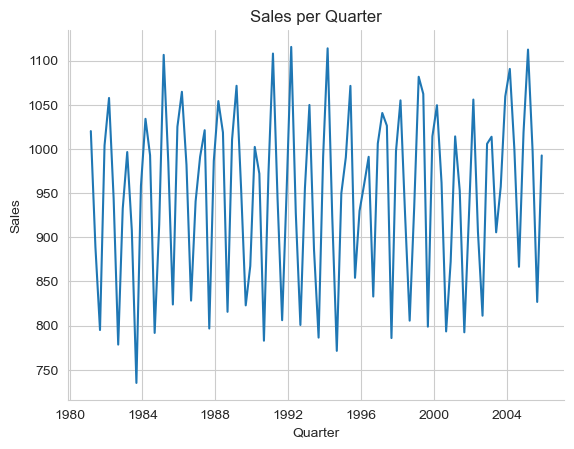

In [15]:
sns.lineplot(
    data=df,
    x=df.index,
    y="Sales",

)
sns.despine()
plt.title("Sales per Quarter")

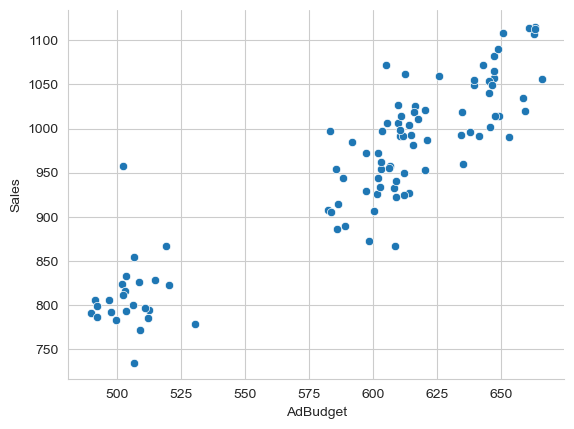

In [18]:
sns.scatterplot(
    data=df,
    x="AdBudget",
    y="Sales",
)
sns.despine()

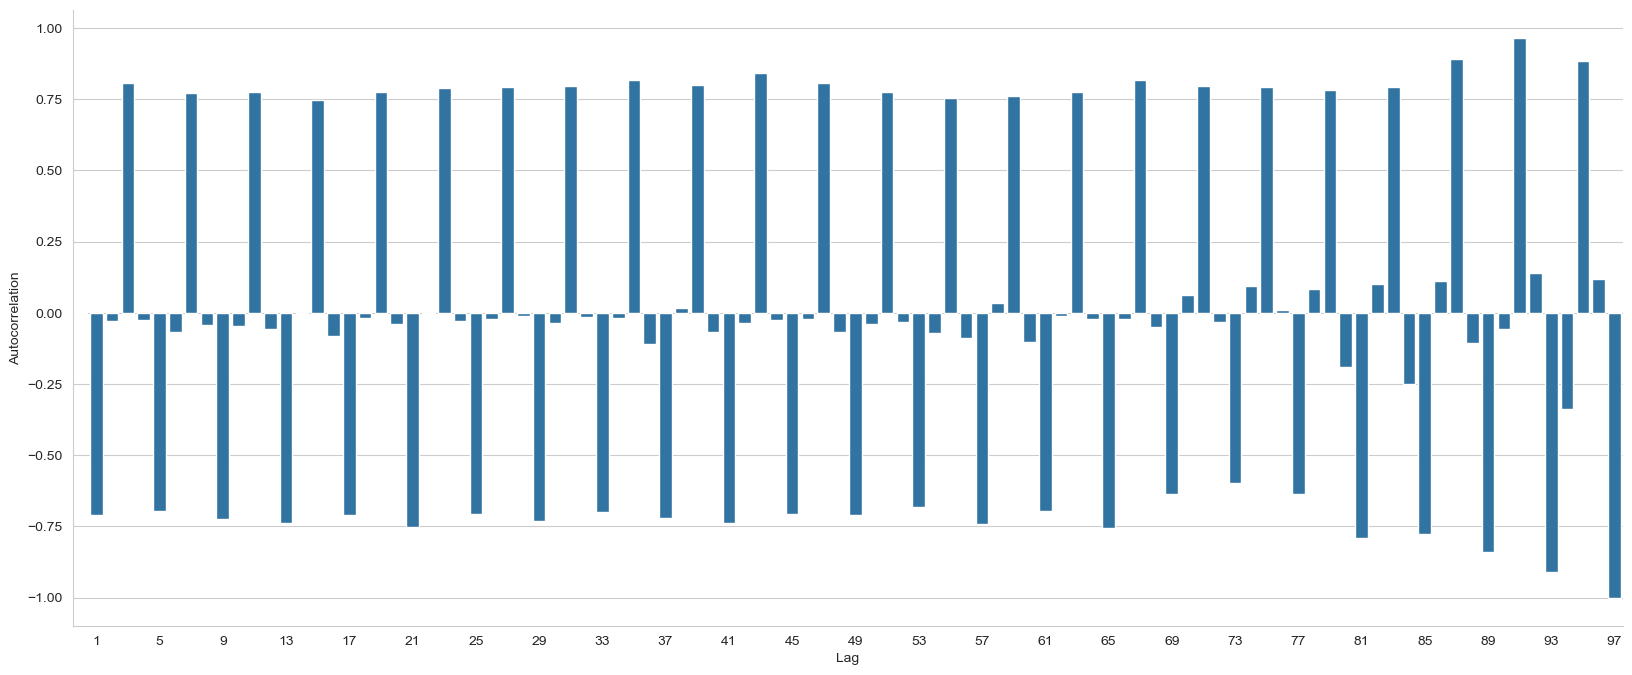

In [37]:
K_MAX = 99
autocorr_values = list(
    map(
        lambda k: df["Sales"].autocorr(lag=k), range(1, K_MAX)
    )
)

k_values = range(1, K_MAX, 4)
autocorr_values_every_4th = [autocorr_values[k-1] for k in k_values]

plt.figure(figsize=(20, 8))
sns.barplot(
    x=range(1, K_MAX),
    y=autocorr_values,
)
sns.despine()
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.xticks(ticks=k_values, labels=k_values)
plt.show()